In [47]:
# Importamos la librería para realizar gráficos y visualizaciones.
import matplotlib.pyplot as plt

# Importamos NumPy, una librería esencial para operaciones numéricas con arreglos.
import numpy as np

# Cargamos el dataset MNIST directamente desde Keras.
# MNIST contiene imágenes de dígitos escritos a mano (0-9), con 60,000 ejemplos para entrenamiento y 10,000 para prueba.
from keras.datasets import mnist

# Importamos herramientas de Keras para construir un modelo de red neuronal secuencial.
from keras.models import Sequential

# Importamos capas: Flatten convierte imágenes 2D en vectores 1D; Dense es una capa completamente conectada.
from keras.layers import Dense, Flatten

# Utilidad de Keras para convertir etiquetas numéricas (0-9) a vectores codificados one-hot.
from keras.utils import to_categorical


- Combina por un lado redes neuronales y Q learning
- La idea es que la red neuronal produnda prediga los valores Q que se van a encargar de estimar que tan buena es cada acción.

1. Entender el estado del entorno
2. Puntuar las acciones posibles
3. Elegir mejor movida
4. Aprende de las consecuencias
5. Explorar nuevas estrategias

In [48]:
# Contiene una tupla que contiene 2 grandes tuplas
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [49]:
# Cargamos el conjunto de datos MNIST, que contiene imágenes de dígitos escritos a mano.
# La función `mnist.load_data()` devuelve dos tuplas:
# - La primera tupla corresponde al conjunto de entrenamiento: (imágenes_entrenamiento, etiquetas_entrenamiento)
# - La segunda tupla corresponde al conjunto de prueba: (imagenes_prueba, etiquetas_prueba)
# Cada imagen tiene tamaño 28x28 píxeles y las etiquetas son enteros del 0 al 9.
(imagenes_entrenamiento, etiquetas_entrenamiento), (imagenes_prueba, etiquetas_prueba) = mnist.load_data()


### Normalizar los valores


In [50]:
# Normalizamos los valores de píxeles de las imágenes.
# Las imágenes están representadas por matrices con valores enteros entre 0 y 255.
# Dividimos cada valor por 255.0 para que los valores estén en el rango [0, 1],
# lo cual ayuda a que la red neuronal entrene de forma más eficiente y estable.
imagenes_entrenamiento = imagenes_entrenamiento / 255.0
imagenes_prueba = imagenes_prueba / 255.0


In [51]:
imagenes_entrenamiento[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [52]:
# Convertimos las etiquetas de los dígitos a codificación one-hot.
# Por ejemplo, la etiqueta '3' se convierte en [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
# Esto es necesario para problemas de clasificación multiclase, como el reconocimiento de dígitos (0-9).
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_prueba = to_categorical(etiquetas_prueba)


In [53]:
etiquetas_entrenamiento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Definir el modelo

In [54]:
# Definimos un modelo secuencial, lo que significa que las capas se apilan una tras otra.
modelo = Sequential([
    # Capa de aplanamiento (Flatten): convierte cada imagen 28x28 en un vector de 784 elementos.
    # Esto es necesario porque las capas Dense (completamente conectadas) esperan vectores 1D como entrada.
    Flatten(input_shape=(28, 28)),
    
    # Primera capa oculta completamente conectada con 128 neuronas y función de activación ReLU.
    # ReLU (Rectified Linear Unit) ayuda a introducir no linealidades en el modelo.
    Dense(128, activation="relu"),
    
    # Capa de salida con 10 neuronas (una por cada dígito del 0 al 9) y activación softmax.
    # Softmax convierte las salidas en probabilidades que suman 1, útiles para clasificación multiclase.
    Dense(10, activation="softmax")
])


/home/felipep/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compilar el modelo

In [55]:
# Compilamos el modelo antes de entrenarlo. Esto define cómo se actualizarán los pesos internos.
modelo.compile(
    # Optimizador: Adam es un algoritmo de optimización eficiente que combina las ventajas de AdaGrad y RMSProp.
    optimizer="adam",
    
    # Función de pérdida: categorical_crossentropy se usa para clasificación multiclase con etiquetas one-hot.
    loss="categorical_crossentropy",
    
    # Métricas: queremos evaluar el rendimiento del modelo con la precisión (accuracy), es decir,
    # el porcentaje de predicciones correctas.
    metrics=["accuracy"]
)


### Entrenar el modelo

In [56]:
# Entrenamos el modelo con el conjunto de entrenamiento usando la función fit().
modelo.fit(
    # Imágenes de entrada del conjunto de entrenamiento.
    imagenes_entrenamiento,
    
    # Etiquetas en formato one-hot correspondientes a las imágenes de entrenamiento.
    etiquetas_entrenamiento,
    
    # Número de épocas: indica cuántas veces el modelo verá todos los datos de entrenamiento.
    # Más épocas pueden mejorar el aprendizaje, pero también pueden causar sobreajuste si son muchas.
    epochs=5,
    
    # Datos de validación: se usan para evaluar el rendimiento del modelo después de cada época,
    # pero sin usarlos para entrenar, lo que permite detectar sobreajuste.
    validation_data=(imagenes_prueba, etiquetas_prueba)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8790 - loss: 0.4318 - val_accuracy: 0.9609 - val_loss: 0.1322
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9654 - loss: 0.1175 - val_accuracy: 0.9699 - val_loss: 0.1000
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9767 - loss: 0.0787 - val_accuracy: 0.9706 - val_loss: 0.0880
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9819 - loss: 0.0595 - val_accuracy: 0.9747 - val_loss: 0.0806
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9871 - loss: 0.0436 - val_accuracy: 0.9778 - val_loss: 0.0733


In [57]:
# Usamos el modelo entrenado para hacer predicciones sobre el conjunto de prueba.
# La función `predict()` devuelve una matriz de probabilidades.
# Cada fila contiene 10 valores, uno por cada clase (dígitos del 0 al 9).
# Por ejemplo, predicciones[0] puede ser algo como [0.01, 0.03, ..., 0.90, ..., 0.01].
predicciones = modelo.predict(imagenes_prueba)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [58]:
# Función para visualizar una imagen junto con su etiqueta real y la predicción del modelo.
# Parámetros:
# - array_predicciones: vector de probabilidades para una imagen (output de modelo.predict()).
# - etiqueta_real: vector one-hot que representa la etiqueta verdadera.
# - img: la imagen correspondiente (matriz 28x28 de píxeles normalizados).

def ver_imagen(array_predicciones, etiqueta_real, img):
    # Convertimos la etiqueta real de one-hot a valor numérico.
    etiqueta_real, img = etiqueta_real.argmax(), img.squeeze()
    
    # Configuramos la visualización de la imagen:
    plt.grid(False)           # Quitamos la cuadrícula
    plt.xticks([])            # Quitamos marcas del eje x
    plt.yticks([])            # Quitamos marcas del eje y
    plt.imshow(img, cmap=plt.cm.binary)  # Mostramos la imagen en escala de grises (blanco y negro)
    
    # Obtenemos la clase predicha (el índice con mayor probabilidad).
    etiqueta_predicha = np.argmax(array_predicciones)

    # Comparamos la etiqueta predicha con la real para definir el color del texto.
    if etiqueta_predicha == etiqueta_real:
        color = "blue"  # Azul si la predicción es correcta
    else:
        color = "red"   # Rojo si es incorrecta

    # Mostramos el texto con predicción y etiqueta real en el borde inferior de la imagen.
    plt.xlabel(f"Pred: {etiqueta_predicha} Real: {etiqueta_real}", color=color)

    return plt  # Retornamos el objeto plt para poder usar .show() externamente


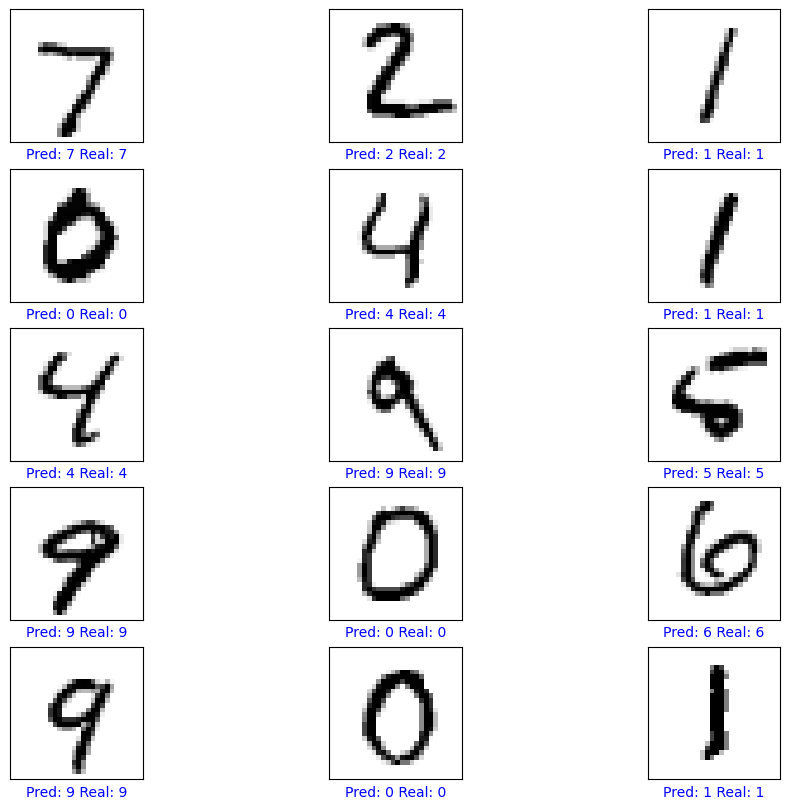

In [59]:
# Definimos cuántas filas y columnas tendrá nuestra grilla de visualización.
filas = 5
columnas = 3
numero_imagenes = filas * columnas  # Total de imágenes a mostrar

# Creamos una figura de tamaño proporcional al número de filas y columnas.
plt.figure(figsize=(2*2*columnas, 2*filas))

# Iteramos sobre cada imagen a mostrar
for item in range(numero_imagenes):
    # Añadimos un subplot a la figura en la posición correspondiente
    # Usamos 2*columnas porque podemos dejar espacio para otra visualización si se desea
    plt.subplot(
        filas,           # número de filas en la grilla
        2*columnas,      # número de columnas duplicadas (por ejemplo, para mostrar también gráficas de barras)
        2*item+1         # posición del subplot (solo usamos las impares)
    )
    
    # Mostramos la imagen con su predicción y etiqueta real usando la función previamente definida
    ver_imagen(predicciones[item], etiquetas_prueba[item], imagenes_prueba[item])

# Mostramos toda la figura completa
plt.show()
